
# Image classifier neural network
Dataset: https://www.cs.toronto.edu/~kriz/cifar.html


# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# load Dataset

In [2]:
from tensorflow.keras import datasets
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

print("{} train samples and {} test samples\n".format(len(x_train), len(x_test)))
print("train samples shape:", x_train.shape)
print("train labels shape:", y_train.shape)

170498071/170498071 [==============================] - 2s 0us/step
50000 train samples and 10000 test samples

train samples shape: (50000, 32, 32, 3)
train labels shape: (50000, 1)


In [3]:
class_names = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck',
}

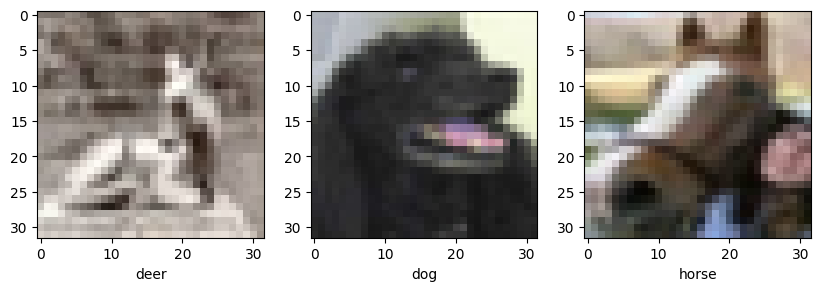

In [5]:
# select a random set of 3 images
idx = np.random.randint(len(x_train) - 3)

plt.figure(figsize=(10,10))
for i in range(3):
    # plot each sample
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i + idx])
    plt.xlabel(class_names[(y_train[i + idx][0])])

# display results
plt.show()

# normalise the data

Convert the 0 to 255 to 0 to 1

In [6]:
print(x_train[0][0][0])

[59 62 63]


In [7]:
x_train = x_train / 255.
x_test = x_test / 255.

In [8]:
print(x_train[0][0][0])

[0.23137255 0.24313725 0.24705882]


In [9]:
print("class {} represents a {}".format(y_train[0][0], class_names[y_train[0][0]]))

class 6 represents a frog


# One hot encoding

In [10]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [11]:
print("class {} represents a {}".format(y_train[0], class_names[np.argmax(y_train[0])]))

class [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.] represents a frog


Now it's time for a fun experiment! We will pick some arbitrary parameters for what we call a **Baseline Model**. This is the initial neural network that we begin our exploration process with. I highly encourage you to change some of the parameters and find how they affect the resuts.

## Exploration Rules
you can remove, add or change the layers and their parameters, as long as you follow the following rules
- do not change the input shape, it must remain: ```input_shape=(32, 32, 3)```
- do not change the output units of the last Dense layer, it must remain: ```layers.Dense(10)```
- do not remove the Softmax layer, it must be last: ```layers.Softmax()```
- do not remove the Flatten layer, it must remain in between the Convolutional/MaxPooling layers and the Dense ones: ```layers.Flatten()```
- do not change the loss, it must remain ```loss = 'categorical_crossentropy'```
- do not change the evaluation metrics, as they are associated with the lost, they must remain at: ```metrics = ['accuracy']```

## Create Model

In [12]:
from tensorflow.keras import Sequential, layers

def build_model():
    model = Sequential()
    # 32 output units, 3 filter size
    model.add(layers.Conv2D(32, 3, activation='relu', padding='same', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    # 32 output units, 5 filter size
    model.add(layers.Conv2D(32, 5, activation='relu', padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10))
    model.add(layers.Softmax())

    model.compile(
        optimizer ='adam',
        loss = 'categorical_crossentropy',
        metrics = ['accuracy'])
    return model

# create model
model = build_model()

# see model details
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        25632     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 64)                1

In [13]:
%%time
history = model.fit(x_train, y_train, epochs=10)
model.save('image-prediction.keras')

print("\ninitial accuracy: {} | latest accuracy: {}".format(history.history["accuracy"][0], history.history["accuracy"][-1]))
print("initial loss: {} | latest loss: {}".format(history.history["loss"][0], history.history["loss"][-1]))

Epoch 1/10
1563/1563 [==============================] - 148s 94ms/step - loss: 1.4446 - accuracy: 0.4800
Epoch 2/10
1563/1563 [==============================] - 152s 97ms/step - loss: 1.0877 - accuracy: 0.6150
Epoch 3/10
1563/1563 [==============================] - 145s 93ms/step - loss: 0.9539 - accuracy: 0.6656
Epoch 4/10
1563/1563 [==============================] - 148s 95ms/step - loss: 0.8678 - accuracy: 0.6964
Epoch 5/10
1563/1563 [==============================] - 143s 92ms/step - loss: 0.8006 - accuracy: 0.7200
Epoch 6/10
1563/1563 [==============================] - 143s 91ms/step - loss: 0.7539 - accuracy: 0.7372
Epoch 7/10
1563/1563 [==============================] - 143s 91ms/step - loss: 0.7027 - accuracy: 0.7516
Epoch 8/10
1563/1563 [==============================] - 145s 93ms/step - loss: 0.6623 - accuracy: 0.7668
Epoch 9/10
1563/1563 [==============================] - 141s 90ms/step - loss: 0.6234 - accuracy: 0.7799
Epoch 10/10
1563/1563 [==============================] 

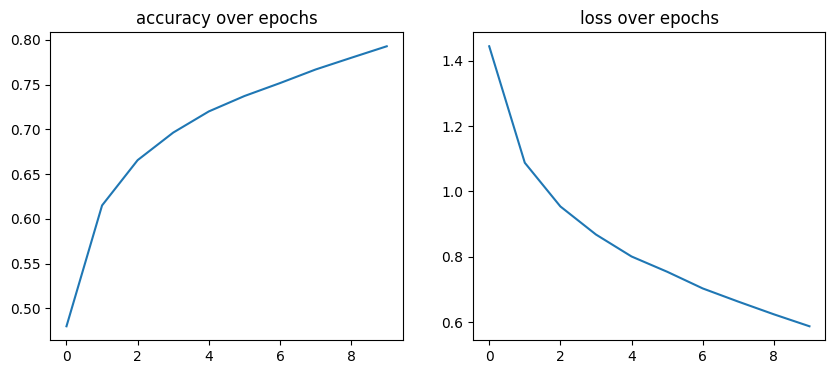

In [14]:
fig, axis = plt.subplots(1, 2, figsize=(10,4))
axis[0].plot(history.history["accuracy"])
axis[0].set_title("accuracy over epochs")
axis[1].plot(history.history["loss"])
axis[1].set_title("loss over epochs")
plt.show()

In [15]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\ntest accuracy score:', test_acc)

313/313 - 6s - loss: 0.9132 - accuracy: 0.6985 - 6s/epoch - 20ms/step

test accuracy score: 0.6984999775886536


In [16]:
predictions = model.predict(x_test)

313/313 [==============================] - 9s 27ms/step


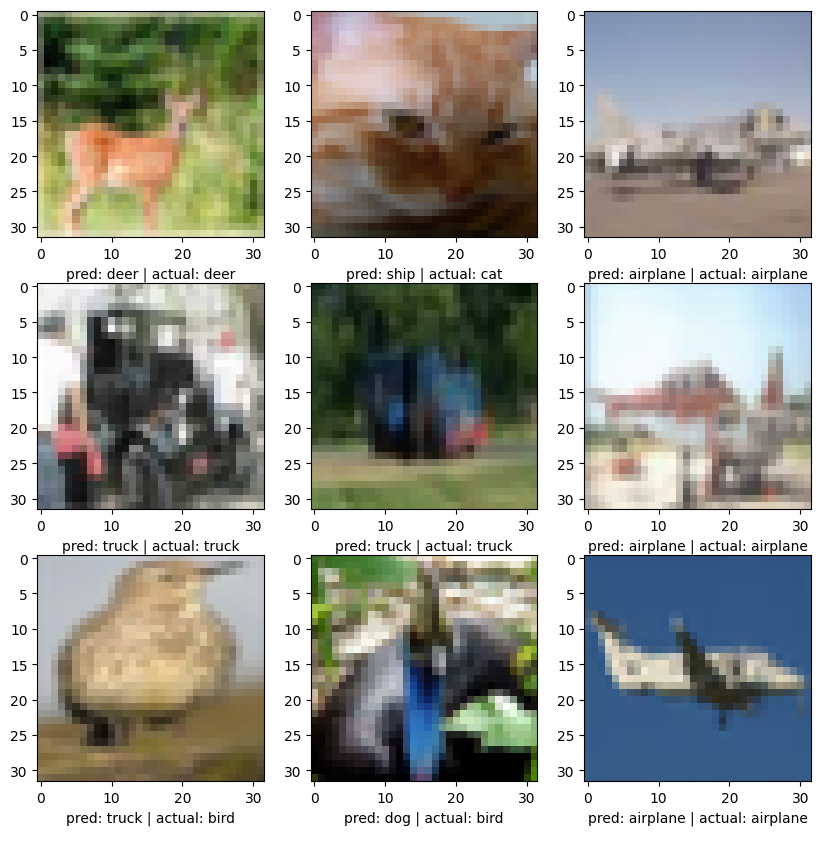

In [18]:
# select a random set of 9 test images
idx = np.random.randint(len(x_test) - 9)

plt.figure(figsize=(10,10))
for i in range(9):
    # plot each test image along with its prediction
    plt.subplot(3, 3, i+1)
    plt.imshow(x_test[i + idx])
    plt.xlabel("pred: {} | actual: {}\n".format(class_names[np.argmax(predictions[i + idx])], class_names[np.argmax(y_test[i + idx])]))

# display results
plt.show()